In [6]:
import pandas as pd
import psycopg2 as pg2

database = 'arch-tpch-scale-1'
conn = pg2.connect("host='localhost'  port=5422 password='yuchao' dbname=%s"%database)

In [7]:
sql = "SELECT * FROM customer"
pd.read_sql(sql, conn)

,c_custkey,c_name,c_address,c_nationkey,c_phone,c_acctbal,c_mktsegment,c_comment
0,1,Customer#000000001,"IVhzIApeRb ot,c,E",15,25-989-741-2988,711.56,BUILDING,"to the even, regular platelets. regular, ironi..."
1,2,Customer#000000002,"XSTf4,NCwDVaWNe6tEgvwfmRchLXak",13,23-768-687-3665,121.65,AUTOMOBILE,l accounts. blithely ironic theodolites integr...
2,3,Customer#000000003,MG9kdTD2WBHm,1,11-719-748-3364,7498.12,AUTOMOBILE,"deposits eat slyly ironic, even instructions...."
3,4,Customer#000000004,XxVSJsLAGtn,4,14-128-190-5944,2866.83,MACHINERY,"requests. final, regular ideas sleep final accou"
4,5,Customer#000000005,KvpyuHCplrB84WgAiGV6sYpZq7Tj,3,13-750-942-6364,794.47,HOUSEHOLD,n accounts will have to unwind. foxes cajole a...
...,...,...,...,...,...,...,...,...
149995,149996,Customer#000149996,syg3m0h2HMEUY6zJ2GEVMKkBl,10,20-149-234-3062,8524.71,AUTOMOBILE,maintain fluffily fluffily bold theodolites! ...
149996,149997,Customer#000149997,ufK xSg6NRC8QaunPB7J,21,31-694-123-5061,8936.21,MACHINERY,xes haggle carefully slow platelets. slyly reg...
149997,149998,Customer#000149998,"NaDi,1fCNPDTntnVUjGyUJ8TrlIeYNK7v",2,12-860-414-6024,5952.41,BUILDING,"ideas cajole slyly around the even, pending f..."
149998,149999,Customer#000149999,nBpZoYhCPFKZqSunxdeHtRN08x3RE8hqh,1,11-401-828-7411,6104.03,AUTOMOBILE,s haggle about the final foxes. carefully spec...


In [40]:
tables = ['customer', 'lineitem', 'nation', 'orders', 'part', 'partsupp', 'region', 'supplier']
keys = {
    'customer': {
        'fk': ['c_nationkey']
    },
    'lineitem': {
        'fk': ['l_partkey', 'l_suppkey']
    },
    'nation': {
        'fk': ['n_regionkey']
    },
    'orders': {
        'fk': ['o_custkey']
    },
    'part': {
        'fk': []
    },
    'partsupp': {
        'fk': ['ps_partkey', 'ps_suppkey']
    },
    'region': {
        'fk': []
    },
    'supplier': {
        'fk': ['s_nationkey']
    }    
}
sql = "SELECT * FROM %s limit 100"
for table in tables:
    df = pd.read_sql(sql%table, conn)
    print(table)
    display(df)

customer


,c_custkey,c_name,c_address,c_nationkey,c_phone,c_acctbal,c_mktsegment,c_comment
0,1,Customer#000000001,"IVhzIApeRb ot,c,E",15,25-989-741-2988,711.56,BUILDING,"to the even, regular platelets. regular, ironi..."
1,2,Customer#000000002,"XSTf4,NCwDVaWNe6tEgvwfmRchLXak",13,23-768-687-3665,121.65,AUTOMOBILE,l accounts. blithely ironic theodolites integr...
2,3,Customer#000000003,MG9kdTD2WBHm,1,11-719-748-3364,7498.12,AUTOMOBILE,"deposits eat slyly ironic, even instructions...."
3,4,Customer#000000004,XxVSJsLAGtn,4,14-128-190-5944,2866.83,MACHINERY,"requests. final, regular ideas sleep final accou"
4,5,Customer#000000005,KvpyuHCplrB84WgAiGV6sYpZq7Tj,3,13-750-942-6364,794.47,HOUSEHOLD,n accounts will have to unwind. foxes cajole a...
...,...,...,...,...,...,...,...,...
95,96,Customer#000000096,vWLOrmXhRR,8,18-422-845-1202,6323.92,AUTOMOBILE,press requests believe furiously. carefully fi...
96,97,Customer#000000097,"OApyejbhJG,0Iw3j rd1M",17,27-588-919-5638,2164.48,AUTOMOBILE,"haggle slyly. bold, special ideas are blithely..."
97,98,Customer#000000098,7yiheXNSpuEAwbswDW,12,22-885-845-6889,-551.37,BUILDING,ages. furiously pending accounts are quickly c...
98,99,Customer#000000099,szsrOiPtCHVS97Lt,15,25-515-237-9232,4088.65,HOUSEHOLD,cajole slyly about the regular theodolites! fu...


lineitem


,l_orderkey,l_partkey,l_suppkey,l_linenumber,l_quantity,l_extendedprice,l_discount,l_tax,l_returnflag,l_linestatus,l_shipdate,l_commitdate,l_receiptdate,l_shipinstruct,l_shipmode,l_comment
0,1,1552,93,1,17.0,24710.35,0.04,0.02,N,O,1996-03-13,1996-02-12,1996-03-22,DELIVER IN PERSON,TRUCK,egular courts above the
1,1,674,75,2,36.0,56688.12,0.09,0.06,N,O,1996-04-12,1996-02-28,1996-04-20,TAKE BACK RETURN,MAIL,ly final dependencies: slyly bold
2,1,637,38,3,8.0,12301.04,0.10,0.02,N,O,1996-01-29,1996-03-05,1996-01-31,TAKE BACK RETURN,REG AIR,"riously. regular, express dep"
3,1,22,48,4,28.0,25816.56,0.09,0.06,N,O,1996-04-21,1996-03-30,1996-05-16,NONE,AIR,lites. fluffily even de
4,1,241,23,5,24.0,27389.76,0.10,0.04,N,O,1996-03-30,1996-03-14,1996-04-01,NONE,FOB,pending foxes. slyly re
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,97,496,26,2,37.0,51670.13,0.02,0.06,A,F,1993-04-13,1993-03-30,1993-04-14,DELIVER IN PERSON,SHIP,ic requests boost carefully quic
96,97,777,74,3,19.0,31877.63,0.06,0.08,R,F,1993-05-14,1993-03-05,1993-05-25,TAKE BACK RETURN,RAIL,gifts. furiously ironic packages cajole.
97,98,403,4,1,28.0,36495.20,0.06,0.07,A,F,1994-12-24,1994-10-25,1995-01-16,COLLECT COD,REG AIR,"pending, regular accounts s"
98,98,1098,4,2,1.0,999.09,0.00,0.00,A,F,1994-12-01,1994-12-12,1994-12-15,DELIVER IN PERSON,TRUCK,. unusual instructions against


nation


,n_nationkey,n_name,n_regionkey,n_comment
0,0,ALGERIA,0,haggle. carefully final deposits detect slyly...
1,1,ARGENTINA,1,al foxes promise slyly according to the regula...
2,2,BRAZIL,1,y alongside of the pending deposits. carefully...
3,3,CANADA,1,"eas hang ironic, silent packages. slyly regula..."
4,4,EGYPT,4,y above the carefully unusual theodolites. fin...
5,5,ETHIOPIA,0,ven packages wake quickly. regu
6,6,FRANCE,3,"refully final requests. regular, ironi"
7,7,GERMANY,3,"l platelets. regular accounts x-ray: unusual, ..."
8,8,INDIA,2,ss excuses cajole slyly across the packages. d...
9,9,INDONESIA,2,slyly express asymptotes. regular deposits ha...


orders


,o_orderkey,o_custkey,o_orderstatus,o_totalprice,o_orderdate,o_orderpriority,o_clerk,o_shippriority,o_comment
0,1,370,O,172799.49,1996-01-02,5-LOW,Clerk#000000951,0,nstructions sleep furiously among
1,2,781,O,38426.09,1996-12-01,1-URGENT,Clerk#000000880,0,"foxes. pending accounts at the pending, silen..."
2,3,1234,F,205654.30,1993-10-14,5-LOW,Clerk#000000955,0,sly final accounts boost. carefully regular id...
3,4,1369,O,56000.91,1995-10-11,5-LOW,Clerk#000000124,0,"sits. slyly regular warthogs cajole. regular, ..."
4,5,445,F,105367.67,1994-07-30,5-LOW,Clerk#000000925,0,quickly. bold deposits sleep slyly. packages u...
...,...,...,...,...,...,...,...,...,...
95,384,1132,F,191275.12,1992-03-03,5-LOW,Clerk#000000206,0,", even accounts use furiously packages. slyly ..."
96,385,331,O,75866.47,1996-03-22,5-LOW,Clerk#000000600,0,hless accounts unwind bold pain
97,386,602,F,119718.02,1995-01-25,2-HIGH,Clerk#000000648,0,haggle quickly. stealthily bold asymptotes ha...
98,387,34,O,197839.44,1997-01-26,4-NOT SPECIFIED,Clerk#000000768,0,are carefully among the quickly even deposits...


part


,p_partkey,p_name,p_mfgr,p_brand,p_type,p_size,p_container,p_retailprice,p_comment
0,1,goldenrod lavender spring chocolate lace,Manufacturer#1,Brand#13,PROMO BURNISHED COPPER,7,JUMBO PKG,901.00,ly. slyly ironi
1,2,blush thistle blue yellow saddle,Manufacturer#1,Brand#13,LARGE BRUSHED BRASS,1,LG CASE,902.00,lar accounts amo
2,3,spring green yellow purple cornsilk,Manufacturer#4,Brand#42,STANDARD POLISHED BRASS,21,WRAP CASE,903.00,egular deposits hag
3,4,cornflower chocolate smoke green pink,Manufacturer#3,Brand#34,SMALL PLATED BRASS,14,MED DRUM,904.00,p furiously r
4,5,forest brown coral puff cream,Manufacturer#3,Brand#32,STANDARD POLISHED TIN,15,SM PKG,905.00,wake carefully
...,...,...,...,...,...,...,...,...,...
95,96,chocolate light firebrick rose indian,Manufacturer#5,Brand#53,STANDARD BRUSHED STEEL,32,SM CASE,996.09,ng to the bli
96,97,coral dodger beige black chartreuse,Manufacturer#3,Brand#33,MEDIUM POLISHED BRASS,49,WRAP CAN,997.09,ss excuses sleep am
97,98,frosted peru chiffon yellow aquamarine,Manufacturer#5,Brand#54,STANDARD ANODIZED BRASS,22,MED JAR,998.09,e the q
98,99,mint grey purple sienna metallic,Manufacturer#2,Brand#21,SMALL BURNISHED STEEL,11,JUMBO PKG,999.09,press


partsupp


,ps_partkey,ps_suppkey,ps_availqty,ps_supplycost,ps_comment
0,1,2,3325,771.64,", even theodolites. regular, final theodolites..."
1,1,27,8076,993.49,ven ideas. quickly even packages print. pendin...
2,1,52,3956,337.09,after the fluffily ironic deposits? blithely s...
3,1,77,4069,357.84,"al, regular dependencies serve carefully after..."
4,2,3,8895,378.49,nic accounts. final accounts sleep furiously a...
...,...,...,...,...,...
95,24,50,2227,511.20,", silent packages boost around the instruction..."
96,24,75,7182,582.03,"the final, ironic asymptotes. regular request..."
97,24,100,5318,62.15,careful requests cajole blithely realms. spec...
98,25,26,9029,832.74,fully fluffily regular frets. sometimes even r...


region


,r_regionkey,r_name,r_comment
0,0,AFRICA,lar deposits. blithely final packages cajole. ...
1,1,AMERICA,"hs use ironic, even requests. s"
2,2,ASIA,ges. thinly even pinto beans ca
3,3,EUROPE,ly final courts cajole furiously final excuse
4,4,MIDDLE EAST,uickly special accounts cajole carefully blith...


supplier


,s_suppkey,s_name,s_address,s_nationkey,s_phone,s_acctbal,s_comment
0,1,Supplier#000000001,"N kD4on9OM Ipw3,gf0JBoQDd7tgrzrddZ",17,27-918-335-1736,5755.94,each slyly above the careful
1,2,Supplier#000000002,"89eJ5ksX3ImxJQBvxObC,",5,15-679-861-2259,4032.68,slyly bold instructions. idle dependen
2,3,Supplier#000000003,"q1,G3Pj6OjIuUYfUoH18BFTKP5aU9bEV3",1,11-383-516-1199,4192.40,blithely silent requests after the express dep...
3,4,Supplier#000000004,Bk7ah4CK8SYQTepEmvMkkgMwg,15,25-843-787-7479,4641.08,riously even requests above the exp
4,5,Supplier#000000005,Gcdm2rJRzl5qlTVzc,11,21-151-690-3663,-283.84,. slyly regular pinto bea
...,...,...,...,...,...,...,...
95,96,Supplier#000000096,"Lbxp3WIipye o2wZme1i9iJx,xTt1Mp",12,22-888-654-7193,3437.24,efully unusual excuses wake fluffily regular t...
96,97,Supplier#000000097,MrCQha2G6ndX1fp6CA,4,14-618-678-1789,6642.22,"s, regular accounts. furiously bold ideas u"
97,98,Supplier#000000098,ogHn8dpXB5Q,21,31-914-775-1978,5873.07,esias use slyly under the ironic foxes. re
98,99,Supplier#000000099,"4SxkTHG28nZrtT0,MnVF9H",18,28-272-909-1617,3671.34,nic dependencies dazzle flu


In [46]:
from scipy.stats import skew, variation
database = 'arch-tpch-scale-0.01'
conn = pg2.connect("host='localhost'  port=5422 password='yuchao' dbname=%s"%database)
stat_array = []
for table in tables:
    sql = "SELECT * FROM %s limit 1"
    df = pd.read_sql(sql%table, conn)
    for attribute in df.columns:
        sql = 'SELECT COUNT(*) FROM %s GROUP BY %s'%(table, attribute)
        df = pd.read_sql(sql, conn)
        count = df['count']
        skewness = skew(count)
        var = variation(count)
        cardinality = len(count) / sum(count)
        stat_array.append((table, attribute, skewness, cardinality, var, count))
        #display(df)
        #print(table, attribute, skewness)
stat_dict = {}
for row in stat_array:
    stat_dict[tuple(row[:2])] = dict(zip(['skewness', 'cardinality', 'variation', 'data'], row[2:]))
stat_df = pd.DataFrame(stat_array, columns=['table', 'attribute', 'skewness', 'cardinality', 'variation', 'data'])

In [38]:
with pd.option_context("display.max_rows", 1000):
    display(stat_df.sort_values(by=['table', 'attribute'], ascending=False))

,table,attribute,skewness,cardinality,variation,data
54,supplier,s_suppkey,0.000000,1.000000,0.000000,0 1 1 1 2 1 3 1 4 1 5 ...
58,supplier,s_phone,0.000000,1.000000,0.000000,0 1 1 1 2 1 3 1 4 1 5 ...
57,supplier,s_nationkey,0.263342,0.250000,0.484768,0 3 1 5 2 8 3 2 4 5 5 ...
55,supplier,s_name,0.000000,1.000000,0.000000,0 1 1 1 2 1 3 1 4 1 5 ...
60,supplier,s_comment,0.000000,1.000000,0.000000,0 1 1 1 2 1 3 1 4 1 5 ...
56,supplier,s_address,0.000000,1.000000,0.000000,0 1 1 1 2 1 3 1 4 1 5 ...
59,supplier,s_acctbal,0.000000,1.000000,0.000000,0 1 1 1 2 1 3 1 4 1 5 ...
51,region,r_regionkey,0.000000,1.000000,0.000000,0 1 1 1 2 1 3 1 4 1 Name: count...
52,region,r_name,0.000000,1.000000,0.000000,0 1 1 1 2 1 3 1 4 1 Name: count...
53,region,r_comment,0.000000,1.000000,0.000000,0 1 1 1 2 1 3 1 4 1 Name: count...


customer c_nationkey


lineitem l_partkey


lineitem l_suppkey


nation n_regionkey


orders o_custkey


partsupp ps_partkey


partsupp ps_suppkey


supplier s_nationkey


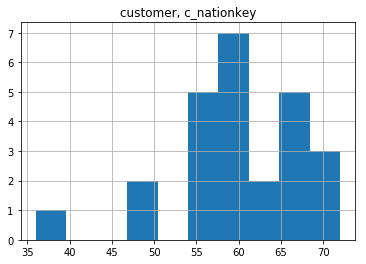

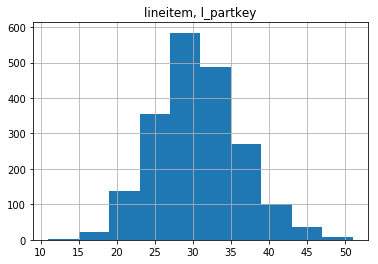

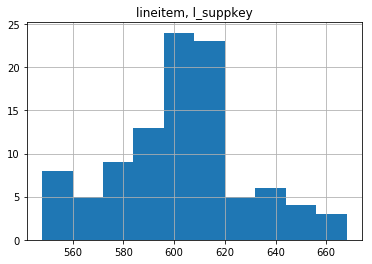

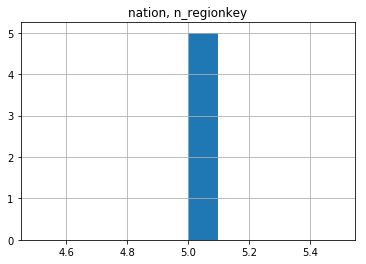

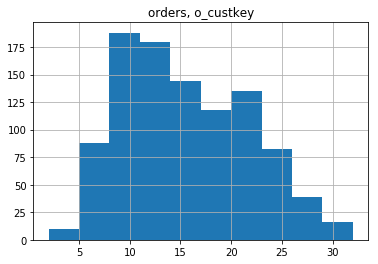

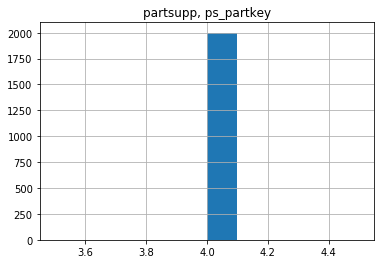

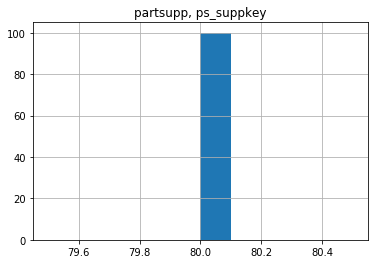

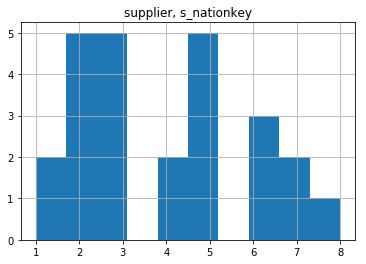

In [56]:
import matplotlib.pyplot as plt
for table, attr_key in keys.items():
    for attribute in attr_key['fk']:
        stat = stat_dict[(table, attribute)]
        print(table, attribute)
        plt.figure()
        plt.title('%s, %s'%(table, attribute))
        display(stat['data'].hist())